<div align="center" style="font-size: 32px; font-weight:bold">
IND5003: Take-Home Exam
</div>
<br>
<div align="center" style="font-size: 24px;">
WU QILONG<br>E1124649@u.nus.edu<br>A0274903B<br>
Time: October 15, 2023
</div>

# Instructions

1. This exam is worth 20% of the final grade.
2. In the questions below, insert a cell (code or markdown, as appropriate), and fill in your answers there.
2. It is a take-home EXAMINATION to assess your understanding of the material, and extend the ideas by learning on your own. 
2. You are required to work on it individually. Any form of plagiarism will result in 0.
2. Good, efficient Python code will get more marks than code that is not neat, difficult to understand and least importantly, slow.
3. Please submit your notebook file (name it `IND5003_THE_<Your_Name>.ipynb`) through Canvas before **15th Oct 2023 23:59hrs**.

# Data

The files `MRCI_clus_2310.csv` and `MRCI_regr_2310.csv` contain information on institutional characteristics, enrollment, costs, and student outcomes for 856 and 851 four-year colleges, respectively, in the United States of America. The column headings are
* `ADM_RATE`: admission rate
* `SAT_AVG`: average SAT equivalent score of students admitted
* `UGDS`: enrollment of undergraduate degree-seeking students
* `COSTT4_A`: average cost of attendance
* `C150_4`: completion rate for first-time, full-time students (150% of expected time to completion)
* `UGDS_WOMEN`: total share of enrollment of undergraduate degree-seeking students who are women
* `STUFACR`: undergraduate student to instructional faculty ratio
* `MD_EARN_WNE_1YR`: median earnings of graduates working and not enrolled 1 year after completing
* `STATE`: Alabama, Alaska, ..., Wisconsin (the files do not contain colleges in Wyoming)

# Question 1: Clustering

**Use the data in the file `MRCI_clus_2310.csv`.**

Cluster the colleges on the five variables `ADM_RATE`, `SAT_AVG`, `C150_4`, `UGDS_WOMEN`, and `STUFACR` **after standardisation** using an **appropriately chosen** linkage method for **each of**
1. Euclidean distance
2. Manhattan distance

*You can choose an appropriate linkage method using what is known as the cophenetic correlation coefficient, but include a small paragraph or two on what is the cophenetic correlation coefficient and how you used it to choose your linkage mathod.*

In **each** case, use the silhouette scores to find the optimal or near-optimal number of clusters, and outline the properties/differences of the clusters you identified.

## 1 Import essential packages

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import myscripts.clust
from scipy.spatial.distance import pdist, squareform
from numpy.random import default_rng
from scipy.cluster import hierarchy

## 2 Read and describe the data

In [2]:
data1 = pd.read_csv('../data/MRCI_clus_2310.csv')

In [3]:
data1.head(3)

,ADM_RATE,SAT_AVG,C150_4,UGDS_WOMEN,STUFACR
0,0.7160,954.0,0.2807,0.5940,18.0
1,0.8854,1266.0,0.6245,0.6210,19.0
2,0.7367,1300.0,0.6072,0.4047,19.0


In [4]:
data1.describe()

,ADM_RATE,SAT_AVG,C150_4,UGDS_WOMEN,STUFACR
count,856.000000,856.000000,856.000000,856.000000,856.000000
mean,0.736254,1163.453271,0.600595,0.575898,13.759346
std,0.202226,128.004176,0.162513,0.115135,3.737971
min,0.039500,840.000000,0.157600,0.000000,5.000000
25%,0.646900,1075.750000,0.482050,0.516100,11.000000
50%,0.781300,1139.000000,0.600050,0.576650,13.000000
75%,0.881525,1232.000000,0.708600,0.631125,16.000000
max,1.000000,1535.000000,0.975700,1.000000,30.000000


## 3 Standardisation

**We propose two ways of standardisation and name those results as data1_scaled_1 and data1_scaled_2 respectively.**

### 3.1 Z-score Method

In this method, use **Z-score normalization** as standardlisation method to **scale all of the features respectively** at the same time, which **may make some values which supposed to be positive negetive** but **ensure that all of the features are scaled by the same process and have similar distribution**. This technique re-scales each feature such that the distribution has a mean $\mu$ of 0 and a standard deviation $\sigma$ of 1, which is crucial for further clustering algorithms to perform optimally by scaling features uniformly. Thus we get scaled data as **data1_scaled_1**.

The formula for Z-score normalization is given by:

$$
Z = \frac{(X - \mu)}{\sigma}
$$

where:
- $X$ is the original feature value,
- $\mu$ is the mean of the feature,
- $\sigma$ is the standard deviation of the feature.

In [5]:
data1_scaled_1 = ((data1 - data1.mean(axis=0)) / data1.std(axis=0))
data1_scaled_1.describe()

,ADM_RATE,SAT_AVG,C150_4,UGDS_WOMEN,STUFACR
count,8.560000e+02,8.560000e+02,8.560000e+02,8.560000e+02,8.560000e+02
mean,-2.988264e-16,6.038783e-16,1.328117e-16,-1.411125e-16,8.508251e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.445421e+00,-2.526896e+00,-2.725902e+00,-5.001946e+00,-2.343342e+00
25%,-4.418519e-01,-6.851594e-01,-7.294475e-01,-5.193749e-01,-7.381935e-01
50%,2.227508e-01,-1.910349e-01,-3.351995e-03,6.530338e-03,-2.031438e-01
75%,7.183595e-01,5.355038e-01,6.645943e-01,4.796714e-01,5.994306e-01
max,1.304214e+00,2.902614e+00,2.308155e+00,3.683524e+00,4.344778e+00


### 3.2 Min-Max Scaling Method

In this method, use **Min-Max scaling** as a normalization method also to **scale all of the features respectively** at the same time. This technique shifts and re-scales the range of each feature individually to a common range, usually [0, 1]. This method makes more sense for **existing features which already range from 0 to 1** like `ADM_RATE`, `C150_4` and `UGDS_WOMEN` since they can **keep positive and stay in that range**, although unlike **Z-score normalization** Min-Max scaling does **not shift the distribution to have a mean of 0 and a standard deviation of 1**, which **may retain the original distribution of the data** better in some cases. Thus we get scaled data as **data1_scaled_2**.

The formula for Min-Max scaling is given by:

$$
X_{\text{norm}} = \frac{(X - X_{\text{min}})}{(X_{\text{max}} - X_{\text{min}})}
$$

where:
- $ X $ is the original feature value,
- $ X_{\text{min}} $ is the minimum value of the feature,
- $ X_{\text{max}} $ is the maximum value of the feature.

In [6]:
data1_scaled_2 = (data1 - data1.min(axis=0)) / (data1.max(axis=0) - data1.min(axis=0))
data1_scaled_2.describe()

,ADM_RATE,SAT_AVG,C150_4,UGDS_WOMEN,STUFACR
count,856.000000,856.000000,856.000000,856.000000,856.000000
mean,0.725408,0.465400,0.541492,0.575898,0.350374
std,0.210543,0.184179,0.198647,0.115135,0.149519
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.632379,0.339209,0.396590,0.516100,0.240000
50%,0.772306,0.430216,0.540826,0.576650,0.320000
75%,0.876653,0.564029,0.673512,0.631125,0.440000
max,1.000000,1.000000,1.000000,1.000000,1.000000


## 4 Two cases discussion for different distances

### Cophenetic correlation coefficient
The cophenetic correlation coefficient (CCC) is a measure used to assess the accuracy of the hierarchical clustering, specifically, how well the clustering algorithm maintains the pairwise distances between the original unclustered data points. **A higher cophenetic correlation coefficient indicates that the clustering is a good representation of the original data distances.**

The choice of linkage method in hierarchical clustering can significantly affect the results. The linkage method determines how the distance between clusters is measured, and different methods may be more suitable for different data distributions.So I **choose the final linkage method with the highest cophenetic correlation coefficient** as it preserves the original distances the best.

The formula for cophenetic correlation coefficient is given by:

$$
r = \frac{\sum\left( (x_i - \bar{x})(y_i - \bar{y}) \right)}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$

where:
- $ x_i $ and $ y_i $ are the original and cophenetic distances (distance at which two points are first combined into a single cluster) respectively,
- $ \bar{x} $ and $ \bar{y} $ are the means of $ x_i $ and $ y_i $ respectively.


### Silhouette coefficient
The Silhouette coefficient summarises the within similarity to the between similarity using the following formula:

\begin{equation*}
S = \frac{b-a}{\max(a,b)}
\end{equation*}

where $a$ is the average distance between an observation and all other observations in the same cluster and $b$ is the average distance between an observation and all other observations in the *next nearest cluster*. This coefficient takes values between -1 and 1, with **values closer to 1 indicating a more optimal clustering**.

### Case1: Euclidean distance

Euclidean distance, also known as L2 distance or L2 norm, is the most common distance metric. It is defined as the straight-line distance between two points in Euclidean space.

The formula for Euclidean distance in a multi-dimensional space (n dimensions) is given by:

$$
d(P, Q) = \sqrt{\sum_{i=1}^n (q_i - p_i)^2}
$$

where:
- $ p_i $ and $ q_i $ are the coordinates of points P and Q in the ith dimension.

#### Step1 Compute the Euclidean distance for scaled data

In [55]:
distance_matrix_1 = pdist(data1_scaled_1, metric='euclidean')
distance_matrix_2 = pdist(data1_scaled_2, metric='euclidean')

#### Step2 Compare cophenetic correlation coefficient over 5 different linkage methods and 2 standardisation methods

In [56]:
linkage_methods = ['centroid', 'single', 'complete', 'average', 'ward']
euclidean_lm1 = dict()
cophenetic_correlations_1 = []
euclidean_lm2 = dict()
cophenetic_correlations_2 = []

# 1)Z-score standardisation
for method in linkage_methods:
    linkage_matrix = hierarchy.linkage(distance_matrix_1, method=method)
    coph_corr, _ = hierarchy.cophenet(linkage_matrix, distance_matrix_1)
    cophenetic_correlations_1.append(coph_corr)
    euclidean_lm1[method] = linkage_matrix

# 2)Min-Max Scaling standardisation
for method in linkage_methods:
    linkage_matrix = hierarchy.linkage(distance_matrix_2, method=method)
    coph_corr, _ = hierarchy.cophenet(linkage_matrix, distance_matrix_2)
    cophenetic_correlations_2.append(coph_corr)
    euclidean_lm2[method] = linkage_matrix

print("Euclidean distance".center(110, "*"))
print('\n')
print("1)When we choose Z-score standardisation method:".center(110, '-'))
for method, coph_corr in zip(linkage_methods, cophenetic_correlations_1):
    print(f'Cophenetic correlation coefficientfor {method:>8} linkage: {coph_corr:.3f}')
print('\n')
print("2)When we choose Min-Max Scaling standardisation method:".center(110, '-'))
for method, coph_corr in zip(linkage_methods, cophenetic_correlations_2):
    print(f'Cophenetic correlation coefficientfor {method:>8} linkage: {coph_corr:.3f}')

**********************************************Euclidean distance**********************************************


-------------------------------1)When we choose Z-score standardisation method:-------------------------------
Cophenetic correlation coefficientfor centroid linkage: 0.760
Cophenetic correlation coefficientfor   single linkage: 0.581
Cophenetic correlation coefficientfor complete linkage: 0.538
Cophenetic correlation coefficientfor  average linkage: 0.767
Cophenetic correlation coefficientfor     ward linkage: 0.572


---------------------------2)When we choose Min-Max Scaling standardisation method:---------------------------
Cophenetic correlation coefficientfor centroid linkage: 0.786
Cophenetic correlation coefficientfor   single linkage: 0.511
Cophenetic correlation coefficientfor complete linkage: 0.642
Cophenetic correlation coefficientfor  average linkage: 0.792
Cophenetic correlation coefficientfor     ward linkage: 0.614


The scenario with the highest cophenetic correlation coefficient which means the best representation of the original data distances, so in this case when using **Euclidean distance** I choose the one(CCC: 0.792) with **Min-Max Scaling Standardisation** and **average linkage** method.

In [57]:
data1_final = data1_scaled_2
lm_final = euclidean_lm2['average']

#### Step3 Use the silhouette scores to find the optimal number of clusters

In [58]:
clust.compute_silhouette_scores(lm_final, data1_final, [2,3,4,5,6])

Computing groupings for k=2
Computing score for k=2
Computing groupings for k=3
Computing score for k=3
Computing groupings for k=4
Computing score for k=4
Computing groupings for k=5
Computing score for k=5
Computing groupings for k=6
Computing score for k=6


[0.5213793496578394,
 0.3310399048125943,
 0.25719216025005304,
 0.24554843882829844,
 0.24463862675326933]

So in this case the optimal number of clusters is **k=2**.

#### Step4 Outline the properties/differences of the clusters

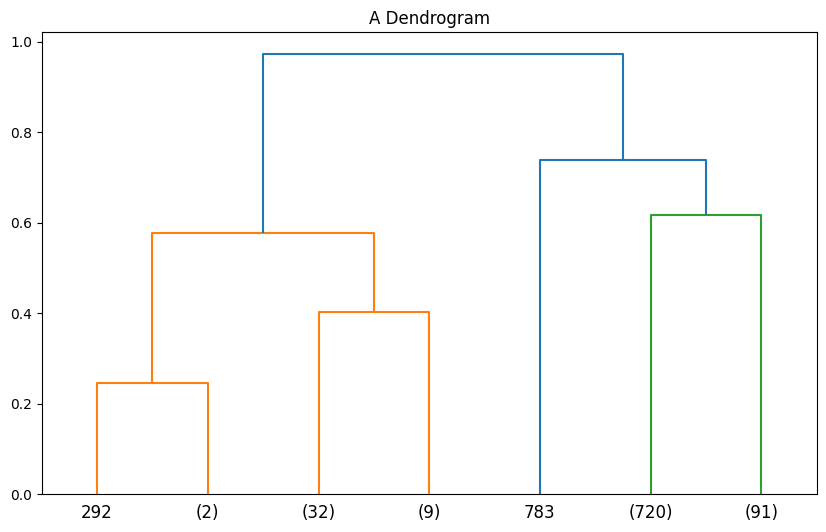

In [59]:
plt.figure(figsize=(10,6))
hierarchy.dendrogram(lm_final, p=2, truncate_mode='level')
plt.title('A Dendrogram');

In [60]:
out = hierarchy.cut_tree(lm_final, n_clusters=2).ravel()
data1['groups'] = out
data1.groupby('groups').agg([np.median, lambda x: np.quantile(x, 0.75) - np.quantile(x, 0.25)])

ADM_RATE            SAT_AVG              C150_4            UGDS_WOMEN  \
         median <lambda_0>  median <lambda_0>   median <lambda_0>     median   
groups                                                                         
0        0.7920   0.206675  1133.0     145.00  0.58530   0.213850    0.57880   
1        0.1325   0.125825  1487.0      77.75  0.92525   0.047875    0.53425   

                  STUFACR             
       <lambda_0>  median <lambda_0>  
groups                                
0          0.1128    13.0       5.00  
1          0.0606     9.0       4.25

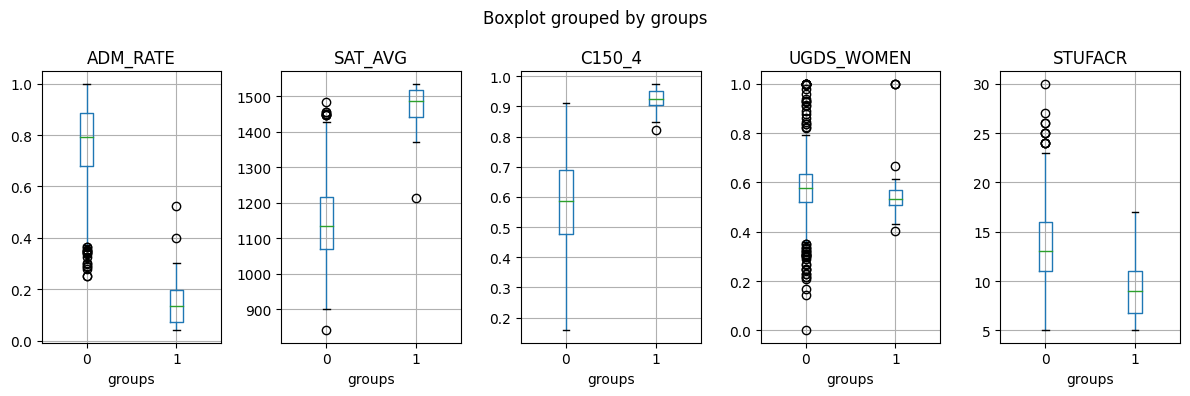

In [61]:
fig, ax = plt.subplots(1, 5, figsize=(12, 4))
for i in range(len(data1.columns) - 1):
    data1.boxplot(data1.columns[i], by='groups', ax=ax[i])  # ADM_RATE
plt.tight_layout()
plt.show()

In [62]:
data1['groups'].value_counts()

groups
0    812
1     44
Name: count, dtype: int64

As we can see in the chart, **group 0** consists of **812 colleges**, which has a relative much higher admission rate, a far lower SAT score requirement, a lower completion rate of first-full time students, a slightly higher women students rate and much higher ratio of undergraduate students to instrutional faculty, corresponds to **normal colleges**. While **group 1** consists of **44 colleges**, which has a much lower admission rate, a far higher SAT score requirement, a extremely higher completion rate of first-full time students, a slightly lower women students rate and much lower ratio of undergraduate students to instrutional faculty, corresponds to **top-tier elite colleges**.

### Case2: Manhattan distance

Manhattan distance, also known as L1 distance or L1 norm, is calculated as the sum of the absolute differences of their coordinates. Unlike Euclidean distance, Manhattan distance computes the distance between two points along the grid-based paths (like a taxi on a city grid) and is not the straight-line distance.

The formula for Manhattan distance in a multi-dimensional space (n dimensions) is given by:

$$
d(P, Q) = \sum_{i=1}^n |q_i - p_i|
$$

where:
- $ p_i $ and $ q_i $ are the coordinates of points P and Q in the ith dimension.

#### Step1 Compute the Manhattan distance for scaled data

In [63]:
distance_matrix_1 = pdist(data1_scaled_1, metric='cityblock')
distance_matrix_2 = pdist(data1_scaled_2, metric='cityblock')

#### Step2 Compare cophenetic correlation coefficient over 5 different linkage methods and 2 standardisation methods

In [64]:
linkage_methods = ['centroid', 'single', 'complete', 'average', 'ward']
euclidean_lm1 = dict()
cophenetic_correlations_1 = []
euclidean_lm2 = dict()
cophenetic_correlations_2 = []

# 1)Z-score standardisation
for method in linkage_methods:
    linkage_matrix = hierarchy.linkage(distance_matrix_1, method=method)
    coph_corr, _ = hierarchy.cophenet(linkage_matrix, distance_matrix_1)
    cophenetic_correlations_1.append(coph_corr)
    euclidean_lm1[method] = linkage_matrix

# 2)Min-Max Scaling standardisation
for method in linkage_methods:
    linkage_matrix = hierarchy.linkage(distance_matrix_2, method=method)
    coph_corr, _ = hierarchy.cophenet(linkage_matrix, distance_matrix_2)
    cophenetic_correlations_2.append(coph_corr)
    euclidean_lm2[method] = linkage_matrix

print("Manhattan distance".center(110, "*"))
print('\n')
print("1)When we choose Z-score standardisation method:".center(110, '-'))
for method, coph_corr in zip(linkage_methods, cophenetic_correlations_1):
    print(f'Cophenetic correlation coefficientfor {method:>8} linkage: {coph_corr:.3f}')
print('\n')
print("2)When we choose Min-Max Scaling standardisation method:".center(110, '-'))
for method, coph_corr in zip(linkage_methods, cophenetic_correlations_2):
    print(f'Cophenetic correlation coefficientfor {method:>8} linkage: {coph_corr:.3f}')

**********************************************Manhattan distance**********************************************


-------------------------------1)When we choose Z-score standardisation method:-------------------------------
Cophenetic correlation coefficientfor centroid linkage: 0.708
Cophenetic correlation coefficientfor   single linkage: 0.562
Cophenetic correlation coefficientfor complete linkage: 0.641
Cophenetic correlation coefficientfor  average linkage: 0.709
Cophenetic correlation coefficientfor     ward linkage: 0.619


---------------------------2)When we choose Min-Max Scaling standardisation method:---------------------------
Cophenetic correlation coefficientfor centroid linkage: 0.780
Cophenetic correlation coefficientfor   single linkage: 0.464
Cophenetic correlation coefficientfor complete linkage: 0.631
Cophenetic correlation coefficientfor  average linkage: 0.782
Cophenetic correlation coefficientfor     ward linkage: 0.540


The scenario with the highest cophenetic correlation coefficient which means the best representation of the original data distances, so in this case when using **Manhattan distance** I still choose the one(CCC: 0.782) with **Min-Max Scaling Standardisation** and **average linkage** method.

In [65]:
data1_final = data1_scaled_2
lm_final = euclidean_lm2['average']

#### Step3 Use the silhouette scores to find the optimal number of clusters

In [66]:
clust.compute_silhouette_scores(lm_final, data1_final, [2,3,4,5,6])

Computing groupings for k=2
Computing score for k=2
Computing groupings for k=3
Computing score for k=3
Computing groupings for k=4
Computing score for k=4
Computing groupings for k=5
Computing score for k=5
Computing groupings for k=6
Computing score for k=6


[0.5120729787729755,
 0.3415148130895435,
 0.2677063482861476,
 0.1951265394170346,
 0.183598367926226]

So in this case the optimal number of clusters is **k=2**.

#### Step4 Outline the properties/differences of the clusters

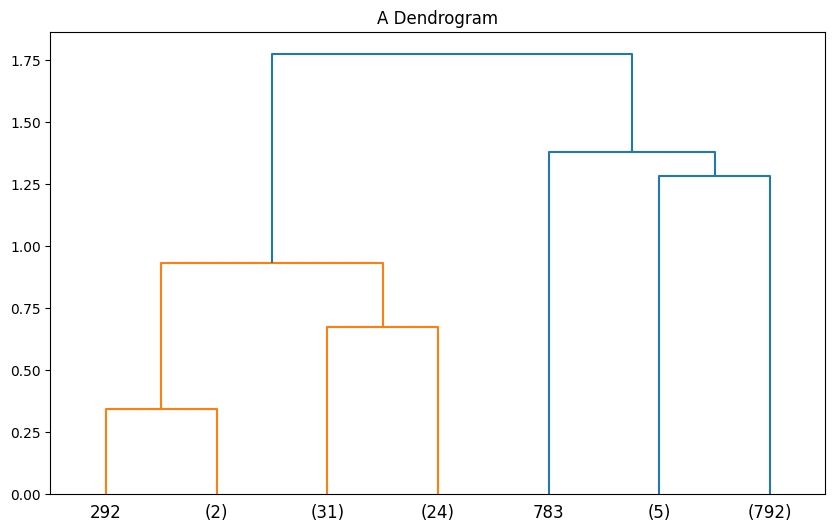

In [67]:
plt.figure(figsize=(10,6))
hierarchy.dendrogram(lm_final, p=2, truncate_mode='level')
plt.title('A Dendrogram');

In [68]:
out = hierarchy.cut_tree(lm_final, n_clusters=2).ravel()
data1['groups'] = out
data1.groupby('groups').agg([np.median, lambda x: np.quantile(x, 0.75) - np.quantile(x, 0.25)])

ADM_RATE            SAT_AVG              C150_4            UGDS_WOMEN  \
         median <lambda_0>  median <lambda_0>   median <lambda_0>     median   
groups                                                                         
0       0.79485   0.203675  1130.5     138.75  0.58195   0.209025    0.57970   
1       0.18665   0.201800  1456.5      85.75  0.90995   0.063225    0.53125   

                  STUFACR             
       <lambda_0>  median <lambda_0>  
groups                                
0        0.113025    13.5       4.00  
1        0.070200     9.0       3.75

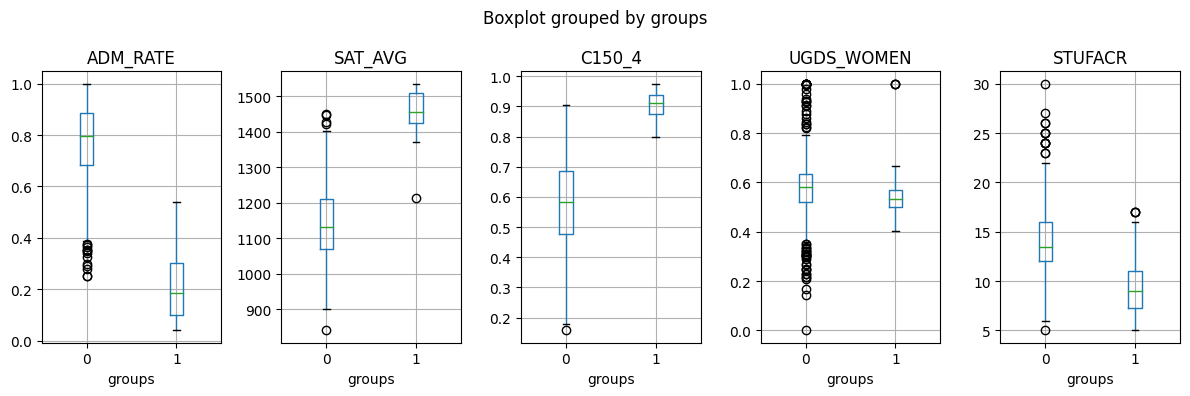

In [69]:
fig, ax = plt.subplots(1, 5, figsize=(12, 4))
for i in range(len(data1.columns) - 1):
    data1.boxplot(data1.columns[i], by='groups', ax=ax[i])  # ADM_RATE
plt.tight_layout()
plt.show()

In [70]:
data1['groups'].value_counts()

groups
0    798
1     58
Name: count, dtype: int64

As we can see in the chart, **group 0** consists of **798 colleges**, which has a relative much higher admission rate, a far lower SAT score requirement, a lower completion rate of first-full time students, a slightly higher women students rate and much higher ratio of undergraduate students to instrutional faculty, corresponds to **normal colleges**. While **group 1** consists of **58 colleges**, which has a much lower admission rate, a far higher SAT score requirement, a extremely higher completion rate of first-full time students, a slightly lower women students rate and much lower ratio of undergraduate students to instrutional faculty, corresponds to **top-tier elite colleges**.

**In previous experiments involving both Euclidean and Manhattan distance measurements, the insights I've derived are consistent across the two cases.**

# Question 2: Regression

**Use the data in the file `MRCI_regr_2310.csv`.**

Use the `statsmodels` package. After you fit a regression model in **each** part, be sure to
* assess its fit,
* study the residuals,
* check for influential points, and
* check for multicollinearity.

*For multicollinearity, you can report what is known as the Variance Inflation Factor (VIF) of the model, but include a small paragraph or two on what is multicollinearity and how it can affect your model.*

## 1 Import essential packages

In [338]:
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as oinf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from myscripts.inference import check_normality as cn

## 2 Read and describe the data

In [74]:
data2 = pd.read_csv('../data/MRCI_regr_2310.csv')

In [75]:
data2.head(3)

,ADM_RATE,SAT_AVG,UGDS,COSTT4_A,C150_4,UGDS_WOMEN,STUFACR,MD_EARN_WNE_1YR,STATE
0,0.7160,954.0,5098.0,21924.0,0.2807,0.5940,18.0,30999.0,Alabama
1,0.8854,1266.0,13284.0,26248.0,0.6245,0.6210,19.0,45270.0,Alabama
2,0.7367,1300.0,7358.0,24869.0,0.6072,0.4047,19.0,57386.0,Alabama


In [77]:
data2.describe().round(3)

,ADM_RATE,SAT_AVG,UGDS,COSTT4_A,C150_4,UGDS_WOMEN,STUFACR,MD_EARN_WNE_1YR
count,851.000,851.000,851.000,851.000,851.000,851.000,851.000,851.000
mean,0.737,1163.611,6141.542,39024.510,0.601,0.576,13.757,43200.456
std,0.202,127.652,8266.529,17010.352,0.162,0.115,3.736,10667.843
min,0.040,840.000,137.000,9715.000,0.158,0.000,5.000,15229.000
25%,0.648,1076.000,1378.000,23675.500,0.484,0.516,11.000,36769.500
50%,0.782,1139.000,2826.000,37413.000,0.602,0.577,13.000,41299.000
75%,0.882,1232.000,7026.500,51020.500,0.709,0.631,16.000,47584.500
max,1.000,1535.000,72229.000,81531.000,0.976,1.000,30.000,118133.000


In [87]:
data2['STATE'].value_counts()

STATE
New York                63
Pennsylvania            54
Texas                   52
Ohio                    39
Massachusetts           37
Illinois                33
North Carolina          31
Florida                 30
Indiana                 28
California              27
Georgia                 27
Missouri                26
Tennessee               26
Wisconsin               26
Virginia                22
New Jersey              22
Michigan                22
South Carolina          18
Louisiana               17
Iowa                    16
Minnesota               16
Oklahoma                15
Alabama                 14
Connecticut             14
Mississippi             14
Colorado                13
Kentucky                12
Arkansas                11
Maryland                11
West Virginia           11
Kansas                  11
Oregon                  11
Washington              10
South Dakota            10
Nebraska                 9
North Dakota             7
Montana               

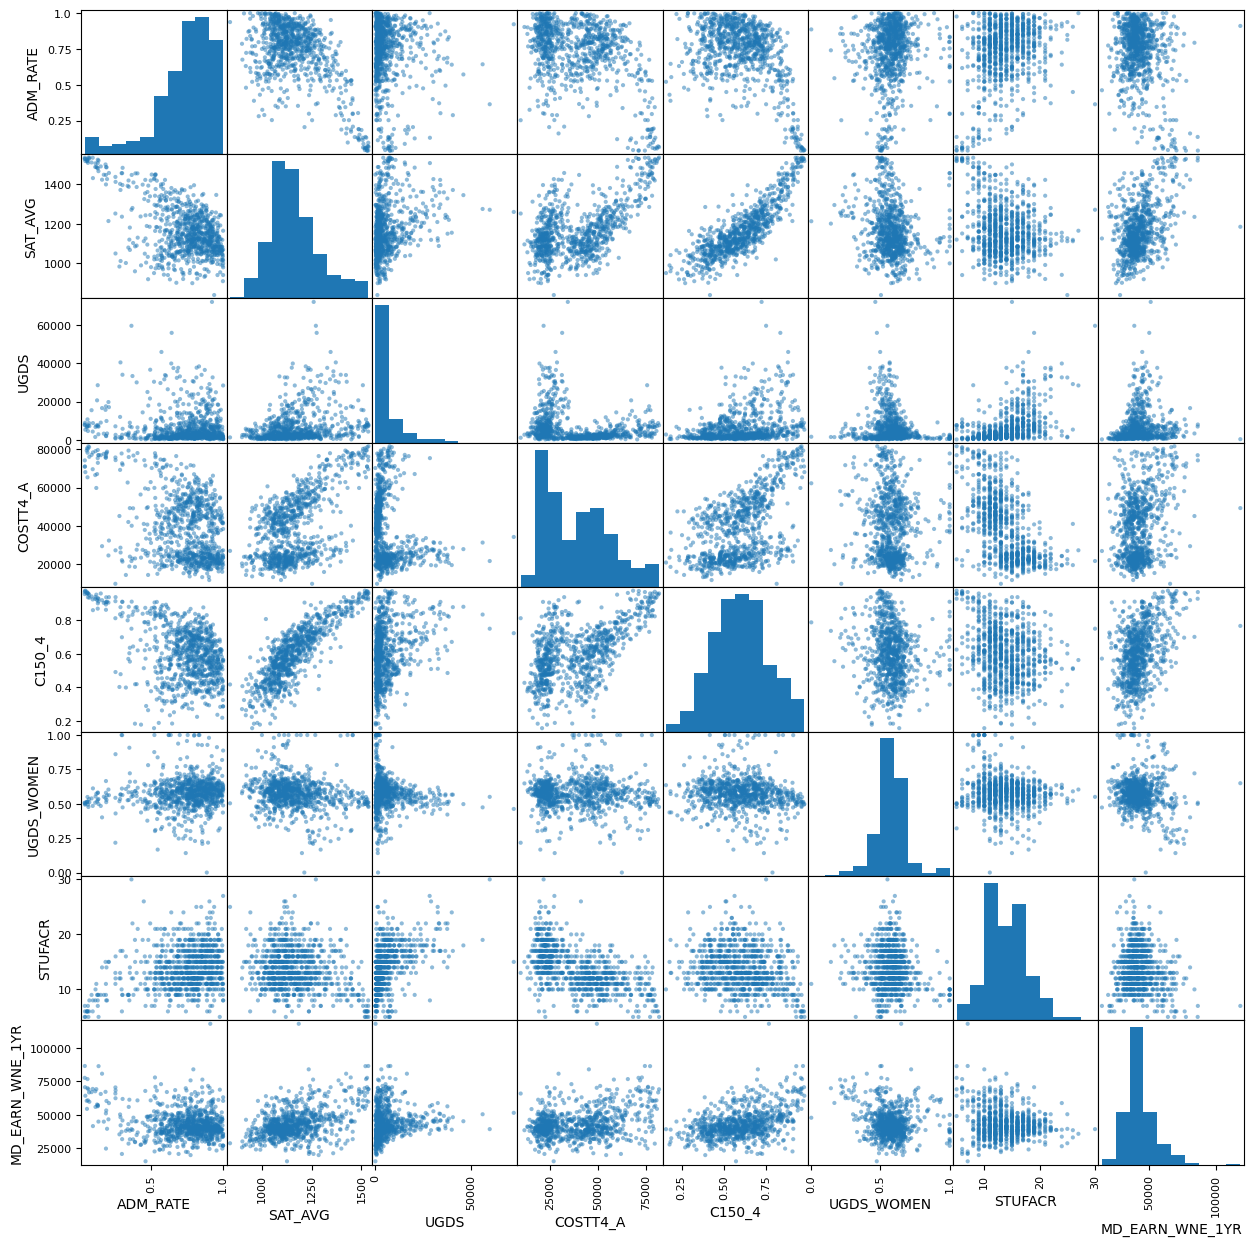

In [95]:
pd.plotting.scatter_matrix(data2.loc[:, list(data2.columns[:-1])], figsize=(15, 15));

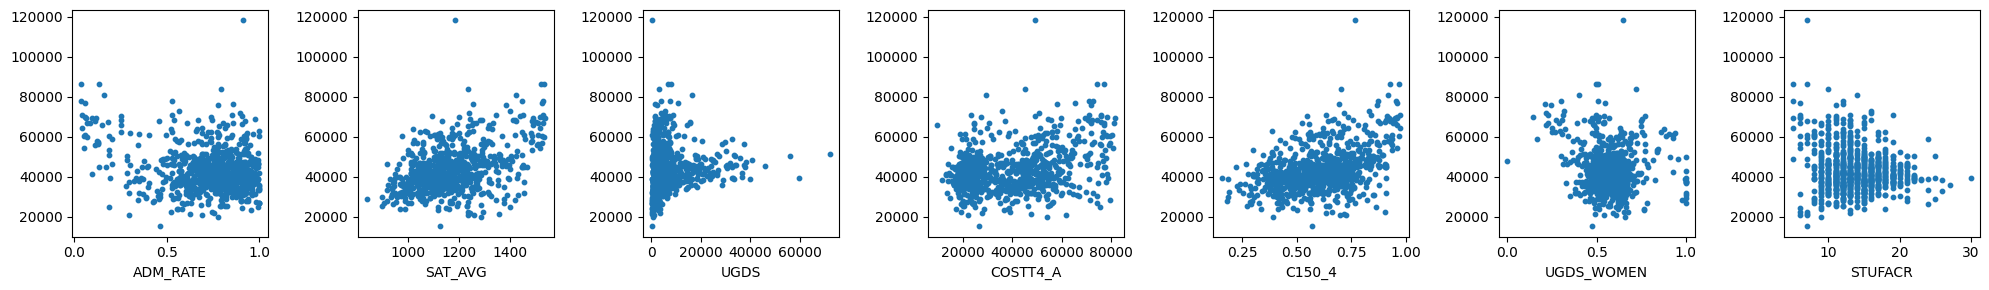

In [103]:
cols = list(data2.columns[:-2])
plt.figure(figsize=(20,3))
for i in np.arange(0,7):
    plt.subplot(1, 7, i+1)
    plt.scatter(data2[cols[i]], data2.MD_EARN_WNE_1YR, s=10)
    plt.xlabel(cols[i])
plt.tight_layout()
plt.show()

## 3 Two parts regression tasks

###  Multicollinearity and Variance Inflation Factor (VIF)

**Multicollinearity**

Multicollinearity is a statistical phenomenon that occurs in multiple regression analysis when **two or more independent variables are highly correlated with each other**. This high degree of correlation causes the model to have **difficulty in estimating the relationship between each independent variable and the dependent variable independently** because the independent variables tend to change together. Multicollinearity can lead to **unstable parameter estimates** which makes it hard to determine the individual effect of each variable. Furthermore, it **inflates the variance of the regression coefficients**, making them statistically insignificant even though they might be crucial for predicting the dependent variable.

**Variance Inflation Factor (VIF)**

The Variance Inflation Factor (VIF) is a metric that quantifies how much a variable is inflating the variances due to multicollinearity. VIF provides an index that measures how much the variance of an estimated regression coefficient is increased because of collinearity.

The formula for VIF for a particular variable is given by:

$$
\text{VIF} = \frac{1}{1 - R^2_i}
$$

where $ R^2_i $ is the R-squared value obtained by regressing that variable against all the other variables.

A $\text{VIF}$ **value of 1** indicates that there's no multicollinearity, whereas a $\text{VIF}$ **value above 5-10** suggests a problematic amount of multicollinearity.

### Part1
Fit a regression model of `MD_EARN_WNE_1YR` on all of `ADM_RATE`, `SAT_AVG`, `UGDS`, `COSTT4_A`, `C150_4`, `UGDS_WOMEN` and `STUFACR`. *Do not standardise these variables.* Outline your findings and suggest *a few* other regression models you might consider fitting. *There is no need at this point to fit the regression models you suggested.*

#### Step1 Define and fit the model

Let's define the model:

$$
\text{MD_EARN_WNE_1YR} = \beta_0 + \beta_1 \text{ADM_RATE} + \beta_2 \text{SAT_AVG} + 
\beta_3 \text{UGDS}  + \beta_4 \text{COSTT4_A}_s + \beta_5 \text{C150_4}_s + \beta_6 \text{UGDS_WOMEN} + \beta_7 \text{STUFACR} + \epsilon
$$

Note that $p=8$ in this case.

In [109]:
y = data2.MD_EARN_WNE_1YR
X = data2[cols]
X = sm.add_constant(X)

s_model = sm.OLS(y, X)
s_results = s_model.fit()

#### Step2 Assess model fit

In [123]:
s_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MD_EARN_WNE_1YR   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     35.77
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           6.92e-44
Time:                        18:38:03   Log-Likelihood:                -8989.4
No. Observations:                 851   AIC:                         1.799e+04
Df Residuals:                     843   BIC:                         1.803e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.44e+04   6241.833      3.908      0.000    1.21e+04    3.66e+04
ADM_RATE     190.1183   1945.929      0.098      0.922   -3629.316    4009.553
SAT_AVG       15.8144      5.303      2.982      0.003       5.405      26.224
UGDS           0.0837      0.055      1.521      0.129      -0.024       0.192
COSTT4_A       0.0490      0.030      1.654      0.098      -0.009       0.107
C150_4      1.204e+04   3852.555      3.125      0.002    4477.105    1.96e+04
UGDS_WOMEN -1.114e+04   2902.217     -3.837      0.000   -1.68e+04   -5438.779
STUFACR     -217.0074    121.077     -1.792      0.073    -454.656      20.641
==============================================================================
Omnibus:                      182.328   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              929.734
Skew:                           0.877   Prob(JB):                    1.29e-202
Kurtosis:                       7.811   Cond. No.                     8.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [275]:
s_results_inf = s_results.get_influence()
RMSPE = np.sqrt((s_results_inf.resid_press**2).mean())
RMSPE

9473.407491069447

#### Step3 Study the residuals

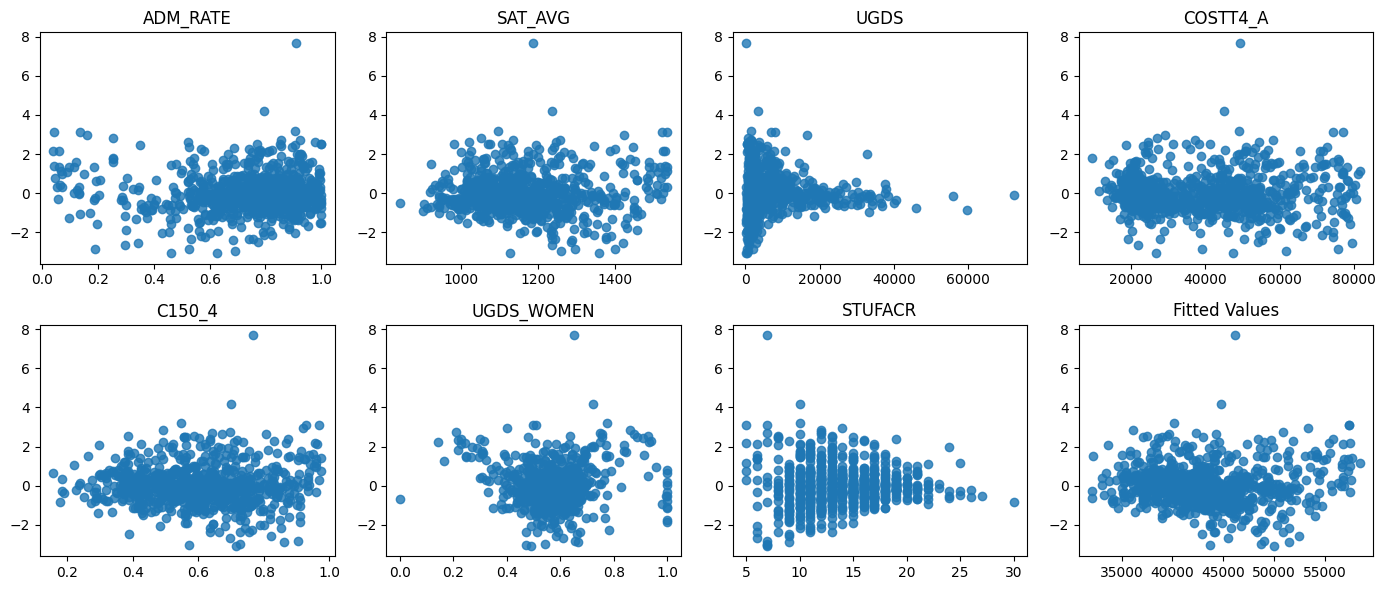

In [341]:
r_star = s_results_inf.get_resid_studentized_external()

f, axs = plt.subplots(2, 4, squeeze=False, figsize=(14,6))

for i,cc in enumerate(X.columns[1:]):
    plt.subplot(2,4, i+1)
    plt.scatter(X[cc], r_star, alpha=0.8)
    plt.title(cc)

plt.subplot(248)
plt.scatter(s_results.fittedvalues, r_star, alpha=0.8)
plt.title('Fitted Values')
plt.tight_layout()

In [ ]:
f, axs = plt.subplots(2, 4, squeeze=False, figsize=(14, 6))

for i, cc in enumerate(X.columns[1:]):
    plt.subplot(2, 4, i + 1)
    plt.scatter(np.arange(len(y)), s_results_inf.dfbetas[:, 2])
    plt.title('betadiff: {}'.format(cc))
    plt.xlabel('id')

plt.subplot(248)
plt.scatter(np.arange(len(y)), s_results_inf.cooks_distance[0])
plt.title('Cooks Distance')
plt.xlabel('id')
plt.tight_layout()
plt.show()

#### Step4 Check for influential points

In [342]:
np.where(s_results_inf.cooks_distance[0] == np.max(s_results_inf.cooks_distance[0]))

(array([375]),)

In [343]:
data2.loc[[375]]

,ADM_RATE,SAT_AVG,UGDS,COSTT4_A,C150_4,UGDS_WOMEN,STUFACR,MD_EARN_WNE_1YR,STATE
375,0.9108,1185.0,254.0,49252.0,0.766,0.6496,7.0,118133.0,Missouri


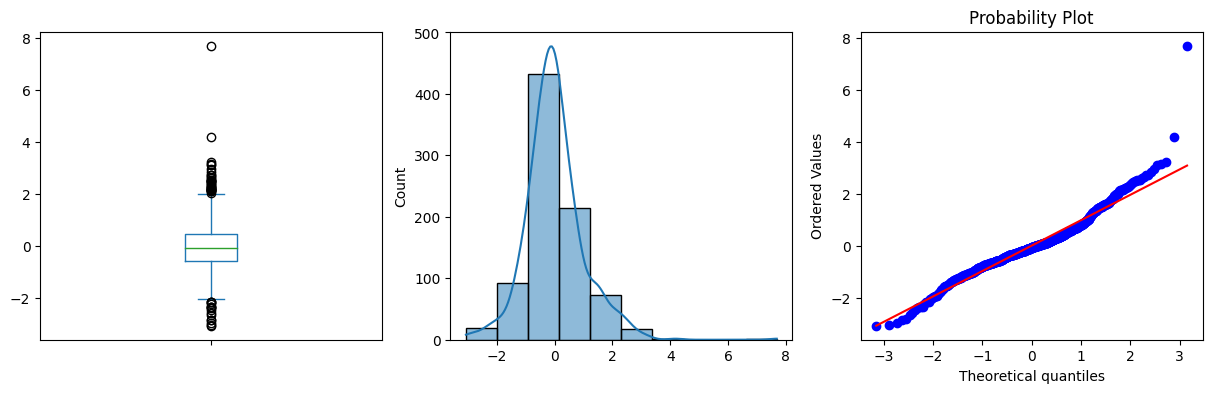

In [344]:
cn(pd.Series(r_star))

#### Step5 Check for multicollinearity

In [211]:
pd.DataFrame(
    index=X.columns,
    data=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    columns=['VIF'])

,VIF
const,374.774286
ADM_RATE,1.480361
SAT_AVG,4.403443
UGDS,1.987787
COSTT4_A,2.442871
C150_4,3.741533
UGDS_WOMEN,1.074511
STUFACR,1.966060


Based on the provided Variance Inflation Factor (VIF) values, the variables can be grouped into two categories regarding multicollinearity:

**Indicating Multicollinearity**:
- `const`: VIF = 374.774286 (This high VIF value indicates multicollinearity, but it's the constant term, which is typically excluded from multicollinearity analysis.)

**Not Indicating Multicollinearity**:
- `ADM_RATE`: VIF = 1.480361
- `SAT_AVG`: VIF = 4.403443
- `UGDS`: VIF = 1.987787
- `COSTT4_A`: VIF = 2.442871
- `C150_4`: VIF = 3.741533
- `UGDS_WOMEN`: VIF = 1.074511
- `STUFACR`: VIF = 1.966060

The variables under the 'Not Indicating Multicollinearity' category have VIF values well below the common threshold of 5 or 10, suggesting that multicollinearity is not a concern for these variables. On the other hand, the `const` term under the 'Indicating Multicollinearity' category shows a high VIF value. However, as it's a constant term, it's typically not a part of multicollinearity analysis.

#### Step6 Outline findings and suggest other regression models for fitting

**Findings from OLS Regression Results**

1. **R-squared Value**: The **adjusted R-squared value** of 0.223 indicates that around 22.3% of the variance in the dependent variable `MD_EARN_WNE_1YR` is explained by the independent variables in the model. This is a relatively low value, suggesting that the model might not be capturing a significant portion of the variability in the dependent variable.

2. **Significant Variables**: 
    - `SAT_AVG`, `C150_4`, and `UGDS_WOMEN` are statistically significant at the 0.05 level as their p-values are below 0.05. 
    - The `const` term is also significant, indicating that the intercept is different from zero.

3. **Insignificant Variables**: 
    - `ADM_RATE`, `UGDS`, `COSTT4_A`, and `STUFACR` are not statistically significant at the 0.05 level as their p-values are above 0.05.

4. **Coefficient Interpretation**: 
    - For example, holding other variables constant, a one-unit increase in `SAT_AVG` is associated with a 15.8144 unit increase in `MD_EARN_WNE_1YR`, which is the highest one among significant variables.

5. **Multicollinearity**: As previously analyzed, apart from the `const` term, multicollinearity does not seem to be a significant issue in this model.

6. **Normality of Residuals**: As we can see, in the QQplot Residuals are not in a straight line and the Jarque-Bera test is significant as well, suggesting that the residuals are not normally distributed, which is a violation of the OLS assumptions.

**Suggestions for Alternative Regression Models**:

1. **Ridge or Lasso Regression**:
    - If multicollinearity is a concern, Ridge or Lasso regression might be helpful as they add regularization terms to the linear regression model which can mitigate multicollinearity.

2. **Transforming Variables**:
    - Consider transforming some of the variables (e.g., log transformation) to improve the linearity relationship and normality of residuals.

3. **Polynomial Regression**:
    - If the relationship between the independent and dependent variables is nonlinear, polynomial regression might provide a better fit.

4. **Generalized Linear Models (GLMs)**:
    - If the dependent variable has a non-normal distribution, GLMs might be a better choice. They allow for different distributions of the dependent variable.

5. **Including Interaction Terms or Additional Variables**:
    - If there are interaction effects between variables, or if other variables not included in the model might be relevant, consider including them in the model.

6. **Checking for Outliers and Influential Points**:
    - Outliers and influential points can significantly affect the regression results. It's advisable to check for and address these points, possibly through robust regression methods.

### Part2
Here are a couple of comments from your boss when you show him/her the analysis:
* "Have you tried standardising the variables `ADM_RATE`, `SAT_AVG`, `UGDS`, `COSTT4_A`, `C150_4`, `UGDS_WOMEN` and `STUFACR`?"
* "Have you tried adding `STATE` to your explanatory variables?"

Address his/her questions and other concerns you may have from part 1. You may remove the *most influential* point if it exists. Recommend a final regression model.

#### Step1 Improve the model

##### a.Drop the most influential point

In [305]:
X2 = X.loc[:, ['ADM_RATE', 'SAT_AVG', 'UGDS', 'COSTT4_A', 'C150_4', 'UGDS_WOMEN', 'STUFACR']]
y2 = y.drop(375)
X2 = X2.drop(index=375)

##### b.Standardisation using Min-Max Scaling

In [306]:
X2_scaled = (X2 - X2.min(axis=0)) / (X2.max(axis=0) - X2.min(axis=0))

##### c.Add `STATE` to variables using one-hot encoding

In [307]:
one_hot_encoded = pd.get_dummies(data2['STATE'].drop(375)).astype(int)
X2_scaled = pd.concat([X2_scaled, one_hot_encoded], axis=1)

#### Step2 Define and fit the model

In [308]:
X2_scaled = sm.add_constant(X2_scaled)
s2_model = sm.OLS(y2, X2_scaled)
s2_results = s2_model.fit()

#### Step3 Assess model fit

In [309]:
s2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MD_EARN_WNE_1YR   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     6.717
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           2.75e-38
Time:                        22:35:14   Log-Likelihood:                -8899.4
No. Observations:                 850   AIC:                         1.791e+04
Df Residuals:                     793   BIC:                         1.818e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.017e+04   3072.135     13.076      0.000    3.41e+04    4.62e+04
ADM_RATE             -2748.2143   1867.873     -1.471      0.142   -6414.774     918.346
SAT_AVG               1.285e+04   3675.202      3.495      0.000    5631.775    2.01e+04
UGDS                  6264.1128   3873.158      1.617      0.106   -1338.741    1.39e+04
COSTT4_A              2531.5086   2156.287      1.174      0.241   -1701.197    6764.214
C150_4                6463.7731   3226.837      2.003      0.046     129.621    1.28e+04
UGDS_WOMEN           -9742.3380   2876.393     -3.387      0.001   -1.54e+04   -4096.093
STUFACR              -4623.7910   3041.621     -1.520      0.129   -1.06e+04    1346.789
Alabama               1972.3476   2387.361      0.826      0.409   -2713.946    6658.641
Alaska                6708.9991   8721.493      0.769      0.442   -1.04e+04    2.38e+04
Arizona               6161.0503   6183.582      0.996      0.319   -5977.075    1.83e+04
Arkansas             -4052.4364   2672.647     -1.516      0.130   -9298.736    1193.864
California            -125.2786   1823.017     -0.069      0.945   -3703.787    3453.230
Colorado              2730.6453   2473.237      1.104      0.270   -2124.219    7585.510
Connecticut           4624.4769   2391.161      1.934      0.053     -69.276    9318.230
Delaware              3085.9746   8699.806      0.355      0.723    -1.4e+04    2.02e+04
District of Columbia  2409.4864   3941.688      0.611      0.541   -5327.890    1.01e+04
Florida              -1498.4229   1705.365     -0.879      0.380   -4845.987    1849.141
Georgia                696.4069   1776.553      0.392      0.695   -2790.896    4183.710
Hawaii               -3657.4262   5040.585     -0.726      0.468   -1.36e+04    6237.040
Idaho                -6316.2291   5025.778     -1.257      0.209   -1.62e+04    3549.173
Illinois              2779.4314   1601.214      1.736      0.083    -363.688    5922.551
Indiana               2085.3274   1727.548      1.207      0.228   -1305.781    5476.435
Iowa                     7.3373   2239.213      0.003      0.997   -4388.149    4402.823
Kansas                4007.4430   2678.733      1.496      0.135   -1250.803    9265.689
Kentucky               286.9991   2553.405      0.112      0.911   -4725.233    5299.232
Louisiana               89.9394   2214.705      0.041      0.968   -4257.437    4437.316
Maine                 4888.8368   5034.374      0.971      0.332   -4993.437    1.48e+04
Maryland              -889.1644   2669.898     -0.333      0.739   -6130.067    4351.738
Massachusetts         3750.8504   1562.679      2.400      0.017     683.374    6818.327
Michigan              5100.9217   1921.258      2.655      0.008    1329.569    8872.274
Minnesota             2689.0205   2236.934      1.202    

In [310]:
s2_results_inf = s2_results.get_influence()
RMSPE = np.sqrt((s2_results_inf.resid_press**2).mean())
RMSPE

16133.652752413816

#### Step4 Study the residuals

/Users/wuqilong/anaconda3/envs/myenv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:848: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


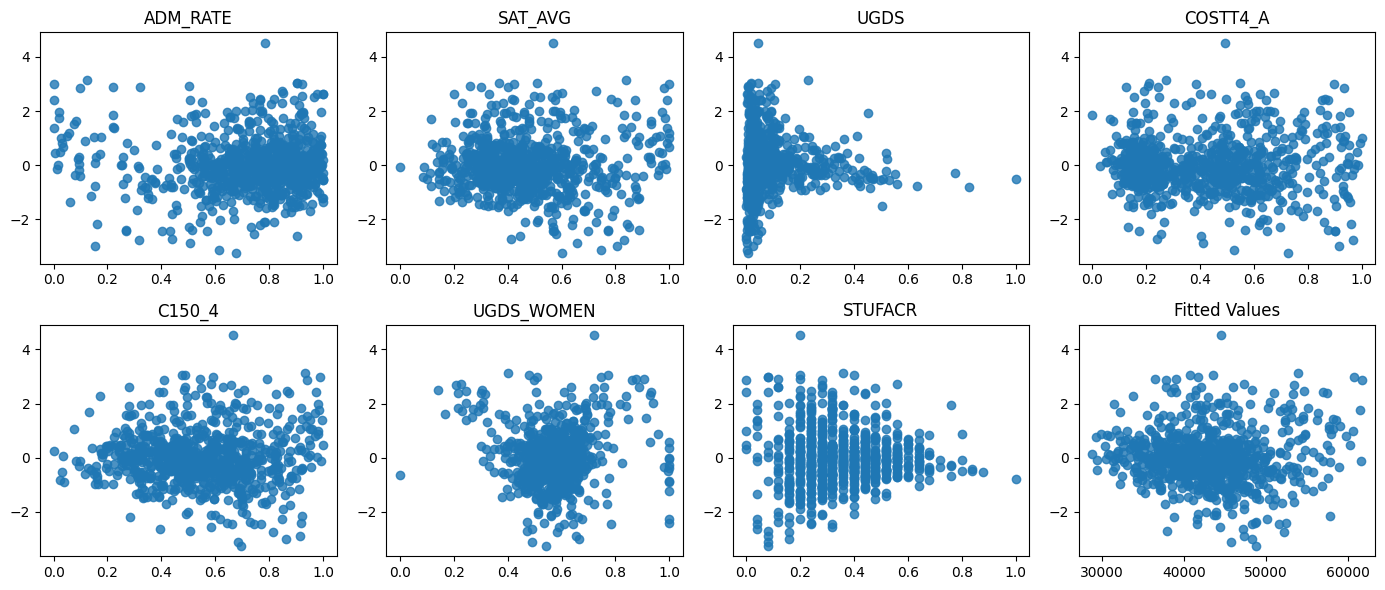

In [345]:
r_star = s2_results_inf.get_resid_studentized_external()

f, axs = plt.subplots(2, 4, squeeze=False, figsize=(14,6))

for i,cc in enumerate(X2_scaled.columns[1:8]):
    plt.subplot(2,4, i+1)
    plt.scatter(X2_scaled[cc], r_star, alpha=0.8)
    plt.title(cc)

plt.subplot(248)
plt.scatter(s2_results.fittedvalues, r_star, alpha=0.8)
plt.title('Fitted Values')
plt.tight_layout()

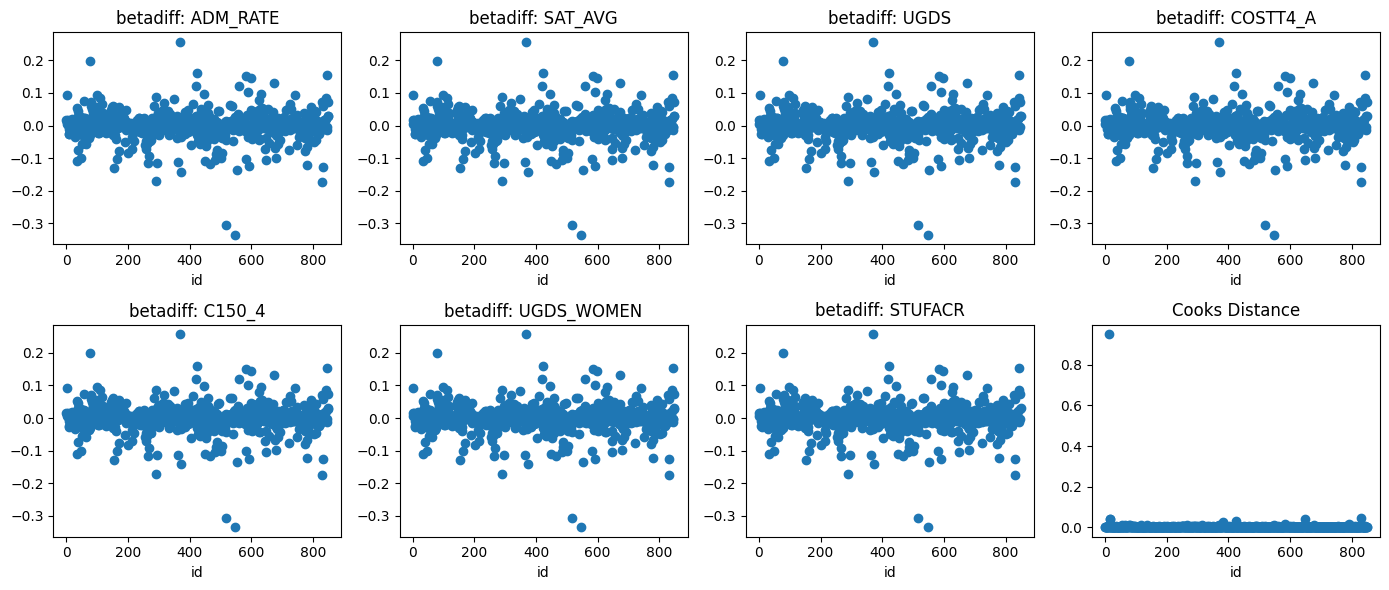

In [346]:
f, axs = plt.subplots(2, 4, squeeze=False, figsize=(14, 6))

for i, cc in enumerate(X2_scaled.columns[1:8]):
    plt.subplot(2, 4, i + 1)
    plt.scatter(np.arange(len(y2)), s2_results_inf.dfbetas[:, 2])
    plt.title('betadiff: {}'.format(cc))
    plt.xlabel('id')

plt.subplot(248)
plt.scatter(np.arange(len(y2)), s2_results_inf.cooks_distance[0])
plt.title('Cooks Distance')
plt.xlabel('id')
plt.tight_layout()
plt.show()

#### Step5 Check for influential points

In [347]:
s2_cookdis = np.where(np.isnan(s2_results_inf.cooks_distance[0]), 0, s2_results_inf.cooks_distance[0])
np.where(s2_cookdis == np.max(s2_cookdis))

(array([14]),)

In [348]:
X2_scaled.iloc[[14]]

,const,ADM_RATE,SAT_AVG,UGDS,COSTT4_A,C150_4,UGDS_WOMEN,STUFACR,Alabama,Alaska,...,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin
14,1.0,0.632379,0.473381,0.055082,0.137936,0.27735,0.5908,0.28,0,1,...,0,0,0,0,0,0,0,0,0,0


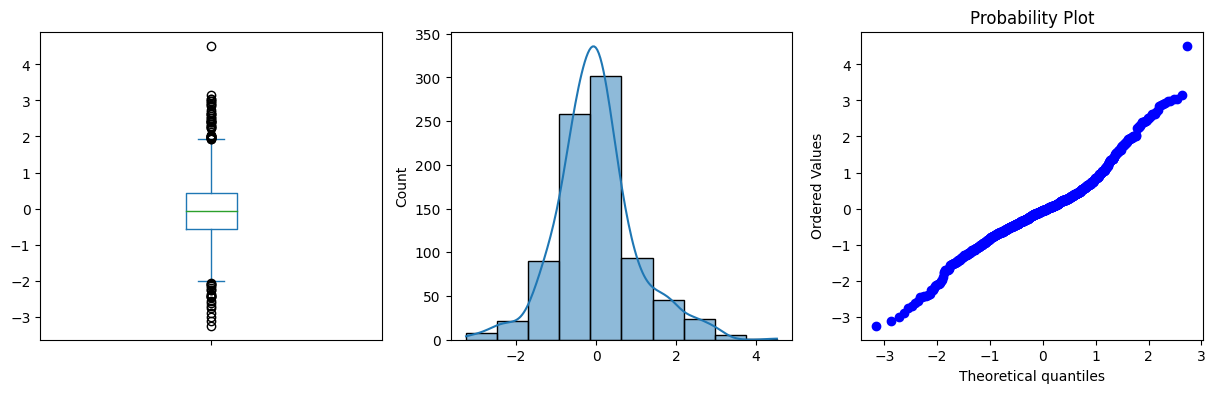

In [349]:
cn(pd.Series(r_star))

#### Step6 Check for multicollinearity

In [354]:
pd.DataFrame(index=X2_scaled.columns[:8],
             data=[
                 variance_inflation_factor(X2_scaled.iloc[:, :8].values, i)
                 for i in range(X2_scaled.iloc[:, :8].shape[1])
             ],
             columns=['VIF'])

,VIF
const,93.006511
ADM_RATE,1.482234
SAT_AVG,4.405766
UGDS,1.986600
COSTT4_A,2.442933
C150_4,3.747293
UGDS_WOMEN,1.074058
STUFACR,1.965730


Based on the provided Variance Inflation Factor (VIF) values, the variables can be grouped into two categories regarding multicollinearity:

**Indicating Multicollinearity**:
- `const`: VIF = 93.006511 (This high VIF value indicates multicollinearity, but it's the constant term, which is typically excluded from multicollinearity analysis.)

**Not Indicating Multicollinearity**:
- `ADM_RATE`: VIF = 1.482234
- `SAT_AVG`: VIF = 4.405766
- `UGDS`: VIF = 1.986600
- `COSTT4_A`: VIF = 2.442933
- `C150_4`: VIF = 3.747293
- `UGDS_WOMEN`: VIF = 1.074058
- `STUFACR`: VIF = 1.965730

The variables under the 'Not Indicating Multicollinearity' category have VIF values well below the common threshold of 5 or 10, suggesting that multicollinearity is not a concern for these variables. On the other hand, the `const` term under the 'Indicating Multicollinearity' category shows a high VIF value. However, as it's a constant term, it's typically not a part of multicollinearity analysis.

#### Step7 Outline findings and recommend a final regression model

**Findings**:

1. **Model Performance**:
    - The **adjusted R-squared value** has improved to 0.274 from the previous model's 0.223, indicating a better but still limited explanation of the variance in the dependent variable `MD_EARN_WNE_1YR`.
    - The model has a significantly larger number of predictors (57), compared to the previous model (8), which might have contributed to the improved R-squared value, so we use **adjusted R-squared value** as comparision standard.

2. **Significant Predictors**:
    - Variables such as `SAT_AVG`, `C150_4`, `UGDS_WOMEN`, `Massachusetts`, `Michigan`, `North Carolina`, `North Dakota`, `Pennsylvania`, `South Carolina`, `South Dakota`, `Texas`, and `Wisconsin` are statistically significant at the 0.05 level.

3. **Insignificant Predictors**:
    - Several variables, including but not limited to `ADM_RATE`, `UGDS`, `COSTT4_A`, `STUFACR`, and state dummies like `Alabama`, `Alaska`, `Arizona` are not significant at the 0.05 level, suggesting they might not be necessary in the model.

4. **State-Level Effects**:
    - The inclusion of state-level dummy variables indicates an attempt to capture geographic effects. However, many of these state variables are not significant.

5. **Residuals**:
    - The Jarque-Bera test is significant, indicating that the residuals are not normally distributed, which is a violation of the OLS assumptions.

6. **Multicollinearity**:
    - The condition number is very high (1.41e+16), suggesting potential multicollinearity issues. This could be due to the inclusion of many state dummy variables.

**Final Model Recommendation**:

1. **Variable Selection**:
    - Given the large number of predictors, variable selection techniques such as stepwise regression, Lasso regression (which can help in feature selection by shrinking some coefficients to zero), or domain knowledge-driven selection could help in creating a more parsimonious model.

2. **Regularization**:
    - Ridge or Lasso regression can also be employed to handle potential multicollinearity and overfitting, especially given lots of extra dummies of the large number of predictors.

3. **Handling Non-Normal Residuals**:
    - Transformations or robust regression techniques can be employed to handle non-normality of residuals.

4. **Geographic Hierarchical Modeling**:
    - If the state-level effects are crucial, considering a hierarchical or mixed-effects model that accounts for clustering within states could be beneficial.

5. **Interaction Effects**:
    - Check for and include interaction terms if they improve the model fit and are interpretable.

6. **Addressing Multicollinearity**:
    - Given the high condition number, addressing multicollinearity by removing/combining highly correlated variables or using dimensionality reduction techniques like PCA might be helpful.